<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Функции" data-toc-modified-id="Функции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функции</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li></ul></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготова-признаков" data-toc-modified-id="Подготова-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготова признаков</a></span><ul class="toc-item"><li><span><a href="#Преобразование-численных-признаков" data-toc-modified-id="Преобразование-численных-признаков-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Преобразование численных признаков</a></span></li><li><span><a href="#Преобразование-категориальных-признаков" data-toc-modified-id="Преобразование-категориальных-признаков-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Преобразование категориальных признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение моделей</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

**Цель исследования** — на основе исторических данных компании «Чётенькое такси» о заказах такси в аэропортах необходимо построить модель, которая будет прогнозировать количество заказов такси на следующий час. Это необходимо для привлечения большего числа водителей в период пиковой нагрузки. 

**Ход исследования**

Исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Анализ данных.
 3. Подготовка данных.
 4. Построение и обучение моделей.
 5. Тестирование.

**Описание данных:**

Набор данных находится в файле `/datasets/taxi.csv`

- **Признаки**

`num_orders` — количество заказов

**Требования:**
Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

## Подготовка данных

### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
import os
from matplotlib import rcParams, rcParamsDefault
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

rcParams['figure.figsize'] = 10,6

In [2]:
pd.options.mode.chained_assignment = None # убираем предупреждение SettingWithCopy

In [3]:
MY_RANDOM_STATE = np.random.seed(12345)

### Функции

Функция, выводящая все необходимые нам характеристики для данных.

In [4]:
def dataframe_information(data):
    '''
    Функция принимает датафрейм для анализа и возвращает датафрейм с основными статистиками данных
    data - датафрейм
    Return:
    df_res - датафрейм с характеристиками данных
    '''
    
    df_data = []
    df_cols = ['name', 'object', 'na', 'zero', 'rate', 'unique', 'neg'
               , 'mean', 'moda', 'std', 'min', 'max', 'out left', 'out rigth', '25%', '50%', '75%']
    
    # перебираем столбцы в наборе данных
    for column_name in data.columns:
               
        # считаем характеристики
        column_type = data[column_name].dtypes
        column_na_values = data[column_name].isna().sum()
        column_zero_values = data[column_name][data[column_name] == 0].count()
        column_na_zero_rate = (column_na_values + column_zero_values) / data.shape[0]
        column_unique_values = data[column_name].nunique()
        column_negative_values = (data[column_name][data[column_name] < 0].count()
                                  if data[column_name].dtypes != 'object' else 0)
        column_mean = data[column_name].mean() if data[column_name].dtypes != 'object' else 0
        column_moda = statistics.mode(data[column_name])
        column_std = data[column_name].std() if data[column_name].dtypes != 'object' else 0
        column_min = data[column_name].min() if data[column_name].dtypes != 'object' else 0
        column_max = data[column_name].max() if data[column_name].dtypes != 'object' else 0
        outliers_left_number = (data[column_name][data[column_name] < data[column_name].quantile(.025)].count()
                                if data[column_name].dtypes != 'object' else 0)
        outliers_right_number = (data[column_name][data[column_name] > data[column_name].quantile(.975)].count()
                                 if data[column_name].dtypes != 'object' else 0)
        percentile_25 = data[column_name].quantile(.25) if data[column_name].dtypes != 'object' else 0
        percentile_50 = data[column_name].quantile(.50) if data[column_name].dtypes != 'object' else 0
        percentile_75 = data[column_name].quantile(.75) if data[column_name].dtypes != 'object' else 0
       
    # собираем показатели по каждому полю
        df_data.append([column_name, column_type, column_na_values
                                 , column_zero_values, column_na_zero_rate, column_unique_values
                                 , column_negative_values, column_mean, column_moda, column_std, column_min
                                 , column_max, outliers_left_number, outliers_right_number
                                 , percentile_25, percentile_50, percentile_75])
    
    # формируем набор данных
    df_res = pd.DataFrame(data = df_data, columns = df_cols)
    
    return df_res

Функция для поиска выбросов.

In [5]:
def search_outliers(df, col, col_name=None, x_name=None, rolling_window_size=None):
    '''
    Функция принимает датафрейм и столбец, ищет выбросы с помощью IQR и строит boxplot
    df - датафрейм
    col - столбец датафрейма
    col_name - наименование столбца (для графика)
    x_name - наименование столбца (для графика)
    rolling_window_size - размер окна для скользящего среднего
    Return:
    lower_fence - верхняя граница нормальных значений
    upper_fence - нижняя граница нормальных значений
    '''
    # находим 3-й и 1-й квартили
    Q3 = np.quantile(df[col], 0.75, axis=0)
    Q1 = np.quantile(df[col], 0.25, axis=0)
    # находим межквартильный размах
    IQR = Q3 - Q1
    # находим границы нормального размаха
    upper_fence = round(Q3 + 1.5 * IQR, 2)
    lower_fence = round(Q1 - 1.5 * IQR, 2)
    # выводим интервалы фактических значений и нормальных значений, количество аномальных значений
    print('-' * 45)
    print(f'Интервал фактических значений для переменной {col} от {round(df[col].min(),2)} до {round(df[col].max(),2)}')
    print(f'Интервал нормальных значений для переменной {col} от {lower_fence} до {upper_fence}')

    print(f'Переменная {col} содержит аномальных значений : {round(df[(df[col]>upper_fence)| (df[col]<lower_fence)].shape[0]/df.shape[0]*100, 2)}%')

    if df[(df[col] == 0)].shape[0]>0:
        print(f'Переменная {col} содержит нулевые значения {round(df[(df[col] == 0)].shape[0]/df.shape[0]*100, 2)}%')
            
    #  строим график по данным
    if rolling_window_size != None and col_name != None and x_name != None and rolling_window_size != None:
        df_copy = df.copy()
        df_copy['rolling_mean'] = df_copy[col].rolling(rolling_window_size).mean()
        df_copy['rolling_std'] = df_copy[col].rolling(rolling_window_size).std()
        df_copy.plot() #  строим график
        plt.title(f'График по данным {col_name}')
        plt.ylabel(col_name)
        plt.xlabel(x_name)
        plt.legend([col_name, 'Скользящее среднее', 'Скользящее стандартное отклонение'])
        plt.show()
    
    #  строим диаграмму размаха    
    if col_name != None:
        df.loc[:, [col]].boxplot().set(title=f'Диаграмма размаха значений переменной {col_name}',
                                         ylabel=col_name) #  строим диаграмму размаха
        plt.show()
    
    return lower_fence, upper_fence

Функция для построения графиков.

In [6]:
def plotting(data, title, xtitle=None, ytitle=None):
    '''
    Функция на основе датафрейма и передаваемых наименований строит график
    data - датафрейм
    title - наименование графика
    xtitle - наименование оси х
    ytitle - наименование оси у
    '''
    # строим график
    data.plot()
    # добавляем наименование графика и осей (если они переданы)
    plt.title(title)
    plt.ylabel(ytitle)
    plt.xlabel(xtitle)
    plt.show()

Функция для создания признаков.

In [7]:
def make_features(data, col, max_lag, rolling_mean_size):
    '''
    Функция на основе датафрейма вычисляет и добавляет к датафрейму признаки (календарные признаки, отстающие значения, 
    скользящее вреднее)
    data - датафрейм
    col - столбец датафрейма
    max_lag - максимальный размер отставания
    x_name - наименование столбца (для графика)
    rolling_window_size - ширина окна для скользящего среднего
    Return:
    data_new_features - датафрейм с новыми признаками
    '''
    data_new_features = data.copy()
    data_new_features['day'] = data_new_features.index.day # признак день
    data_new_features['hour'] = data_new_features.index.hour # признак час
    
    for lag in range(1, max_lag + 1): # новые признаки с отставанием на 1 и до величины max_lag
        data_new_features['lag_{}'.format(lag)] = data_new_features[col].shift(lag)
    #  признак скользящее среднее
    data_new_features['rolling_mean'] = data_new_features[col].shift().rolling(rolling_mean_size).mean()
    data_new_features.dropna(inplace=True) # удаляем пропущенные значения
    
    return data_new_features

### Обзор данных

#### Загрузка данных

Считаем данные из csv-файлов `/datasets/taxi.csv` в датафрейм и сохраним в переменную `data`.

In [8]:
# чтение файла с данными и сохранение в data
pth1 = '/datasets/taxi.csv'
pth2 = 'https://code.s3.yandex.net/datasets/taxi.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, index_col=[0], parse_dates=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, index_col=[0], parse_dates=[0])
else:
    print('Something is wrong')

#### Изучение общей информации о данных

Проверим размерность датасета.

In [9]:
# посмотрим на размер датасета
data.shape

(26496, 1)

Выведем первые 5 строчек на экран.

In [10]:
# получение первых 5 строк таблицы data
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Видим, что данные есть за каждые 10 минут, в таблице один столбец с количеством заказов.

Выведем основную информацию о датафрейме.

In [11]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Посмотрим основные статистичекие метрики.

In [12]:
# выводим статистические метрики
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


Выведем характеристики данных в `data`.

In [13]:
# вызываем функцию для расчета характеристик по данным
dataframe_information(data)

,name,object,na,zero,rate,unique,neg,mean,moda,std,min,max,out left,out rigth,25%,50%,75%
0,num_orders,int64,0,537,0.020267,81,0,14.070463,9,9.21133,0,119,537,601,8.0,13.0,19.0


Видим, что отрицательных и пропущенных значений нет, есть выбросы. В среднем видим 14 вызовов за период (10 минут), максимум 119. Самое частое значение - 13 вызовов за период. 

Проверим индекс на монотонность.

In [14]:
# проверка индекса на монотонность
data.index.is_monotonic

True

Порядок соблюден, дата и время расположены в хронологическом порядке.

Проведем ресемплирование данных по одному часу.

In [15]:
data = data.resample('1H').sum()

Посмотрим теперь на размер полученного датасета.

In [16]:
# посмотрим на размер датасета
data.shape

(4416, 1)

Выведем первые 5 строчек на экран.

In [17]:
# получение первых 5 строк таблицы data
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


Видим, что период изменился на 1 час.

Посмотрим основные статистические метрики.

In [18]:
# выводим статистические метрики
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.0,54.0,78.0,107.0,462.0


In [19]:
# вызываем функцию для расчета характеристик по данным
dataframe_information(data)

,name,object,na,zero,rate,unique,neg,mean,moda,std,min,max,out left,out rigth,25%,50%,75%
0,num_orders,int64,0,1,0.000226,251,0,84.422781,73,45.023853,0,462,101,111,54.0,78.0,107.0


В среднем видим 84 вызова за период (1 час), максимум 462. Самое частое значение - 73 вызова за период.

**Выводы:** В каждой строке таблицы — данные о количестве вызова такси каждые 10 минут.  

Предварительно можно утверждать, что, данных достаточно для построения модели, прогнозирующей количество заказов такси на следующий час. Было проведено ресемплирование данных по одному часу.

## Анализ

Проверим, нет ли пропусков.

In [20]:
# проверка на пропуски
data.isna().sum()

num_orders    0
dtype: int64

Пропусков нет. Посмотрим наличие выбросов. Так же построим график по нашим данным (дополнительно чтобы во временном ряду снизить колебания, применим скользящее среднее - размер окна выберем неделю и посмотрим скользящее стандартное отклонение).

---------------------------------------------
Интервал фактических значений для переменной num_orders от 0 до 462
Интервал нормальных значений для переменной num_orders от -25.5 до 186.5
Переменная num_orders содержит аномальных значений : 2.74%
Переменная num_orders содержит нулевые значения 0.02%


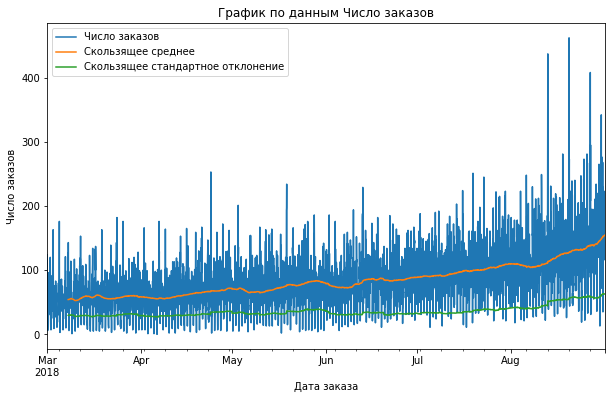

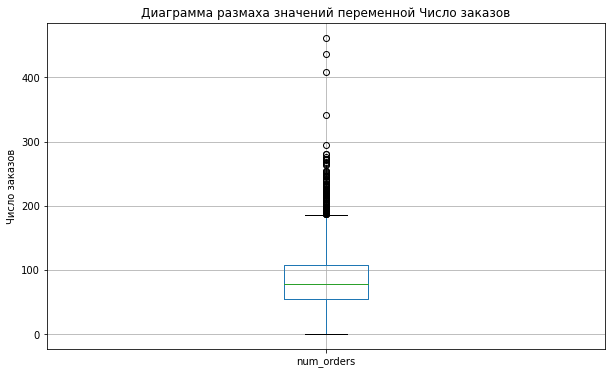

(-25.5, 186.5)

In [21]:
search_outliers(data, 'num_orders', 'Число заказов', 'Дата заказа', 24*7)

Наличие выбросов определили с помощью стандартной диаграммы размаха, все эти значения вполне естественно вписываются во временной ряд. А в список выбросов они попали из-за того, что находятся в конце временного ряда, а у нас есть рост заказов с течением времени. Поэтому принято решение найденные выбросы не удалять.

Разделим данные на трендовую, сезонную и шумовую состовляющие и построим соответствующие графики.

In [22]:
# проверка на пропуски
data.isna().sum()

num_orders    0
dtype: int64

In [23]:
# разбиваем данные на трендовую, сезонную и шумовую состовляющие
decomposed = seasonal_decompose(data)

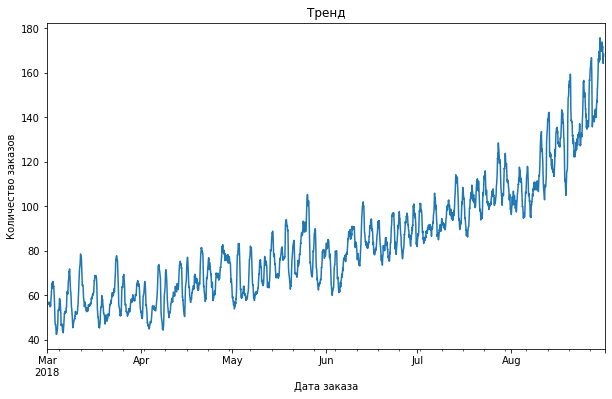

In [24]:
# строим график по трендовой составляющей
plotting(decomposed.trend, 'Тренд', 'Дата заказа', 'Количество заказов')

Посмотрим на скользящее среднее тренда, чтобы сгладить колебания - размер окна выберем неделю (подобран экспериментально, меньше - колебания сильные, а если окно брать больше, то получается почти прямая линия).

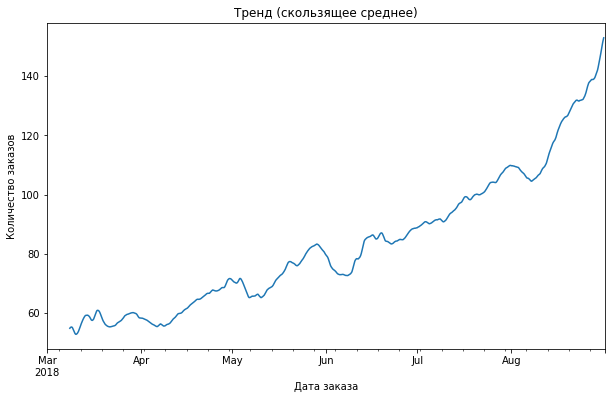

In [25]:
# строим график скользящее среднее тренда с размером окна - неделя
plotting(decomposed.trend.rolling(24*7).mean(), 'Тренд (скользящее среднее)', 'Дата заказа', 'Количество заказов')

Видим, что мы имеем положительный тренд - количество заказов растет.

Посмотрим на сезонность.

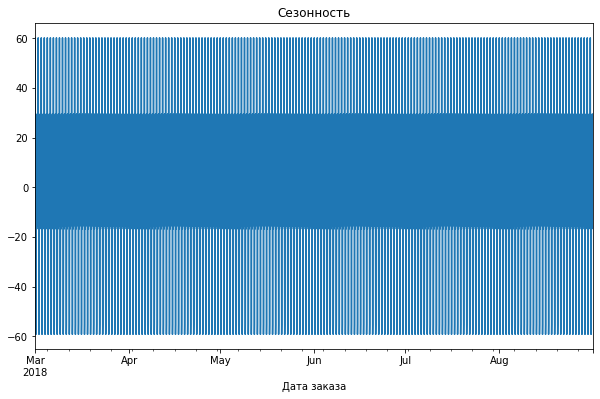

In [26]:
# строим график по сезонной составляющей
plotting(decomposed.seasonal, 'Сезонность', 'Дата заказа')

По графику трудно что-либо понять, посмотрим на данные за последнюю неделю.

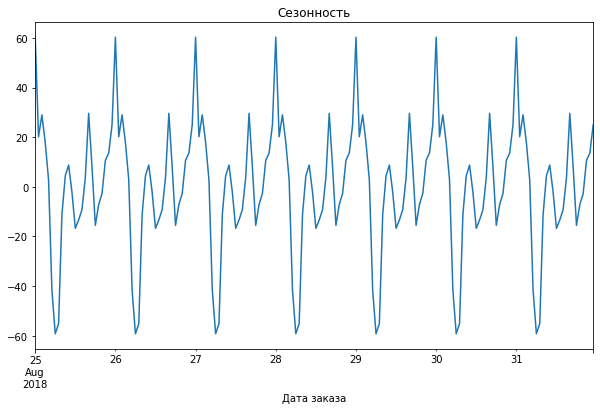

In [27]:
# строим график по сезонной составляющей за последнюю неделю
plotting(decomposed.seasonal.tail(24*7), 'Сезонность', 'Дата заказа')

Видим, что количество заказов меняется в течение дня и так каждый день. Посмотрим еще подробнее - за сутки.

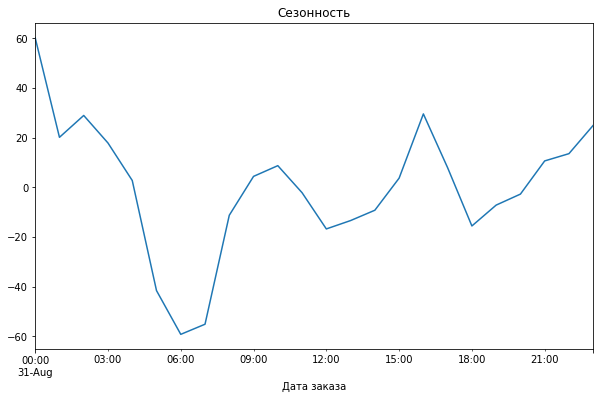

In [28]:
# строим график по сезонной составляющей за последние сутки
plotting(decomposed.seasonal.tail(24), 'Сезонность', 'Дата заказа')

Минимальное количество заказов бывает в 6 утра, максимум же достигается в полночь.

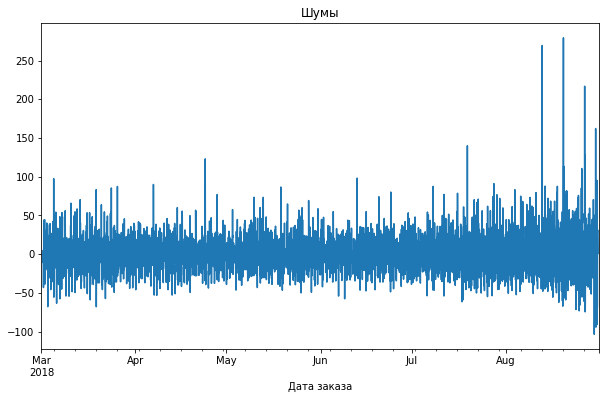

In [29]:
# строим график по шумовой составляющей
plotting(decomposed.resid, 'Шумы', 'Дата заказа')

Шумы никак не объясняются.

Обобщим: наблюдается тренд равномерного роста заказов с периодическими небольшими падениями. Присутствует сезонность по дням - спад ночью, рост с утра и днем, пик к вечеру.

Так же стоит сказать о стационарсности временного ряда: мы видим, что среднее временного ряда с течением времени увеличивается, так же заметно незначительное увеличение стандартного отклонения. Нестационарные прогнозировать сложнее: их свойства меняются слишком быстро, поэтому чтобы ряд сделать стационарным, необходимо найти разности его значений.

In [30]:
# сделаем копию датафрейма с помощью метода .copy()
data_copy = data.copy()

# Из данных за январь-июнь 2018 нужно вычесть результат вызова метода shift().
data = data - data_copy.shift()
data.dropna(inplace=True)

Посмотрим, как изменился временной ряд.

---------------------------------------------
Интервал фактических значений для переменной num_orders от -269.0 до 193.0
Интервал нормальных значений для переменной num_orders от -89.5 до 90.5
Переменная num_orders содержит аномальных значений : 2.79%
Переменная num_orders содержит нулевые значения 1.2%


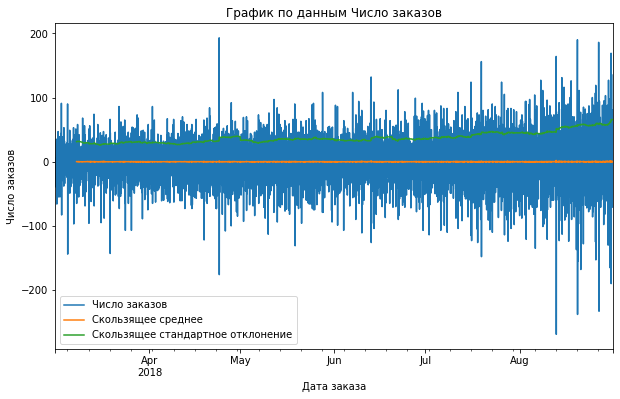

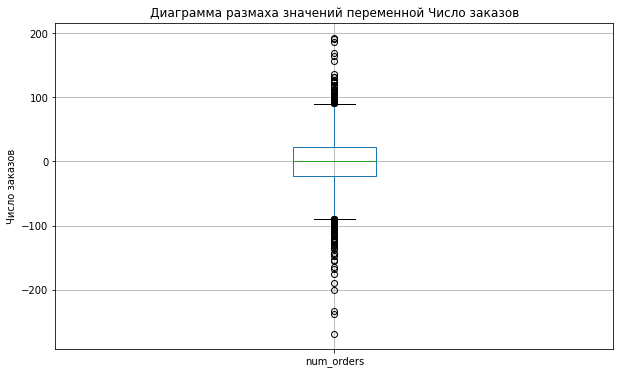

(-89.5, 90.5)

In [31]:
search_outliers(data, 'num_orders', 'Число заказов', 'Дата заказа', 24*7)

Теперь временной ряд стал стационарным.

**Выводы:** в ходе анализа данных было выявлено:
1. Наблюдается тренд равномерного роста заказов с периодическими небольшими падениями. 
2. Присутствует сезонность по дням - спад ночью, рост с утра и днем, пик к вечеру.
3. Сезонности в зависимости от дня недели или месяца не наблюдается.
4. Для прогнозирование временной ряд был преобразован в более стационарный - была найдена разность его значений.

## Обучение

### Подготова признаков

Создадим признаки для одношагового прогноза с горизонтом в один час. Из временных признаков для нас информативными будут - день и час (день недели и месяц, как было выяснено в предыдущем разделе не имеют существенного значения). Максимальный размер отставания (max_lag) будем подбирать эксперементально. Вызовем функцию make_features() с max_lag = 4 и rolling_mean_size = 24.

In [32]:
#make_features(data, 'num_orders', 6, 5)
data_new_features = make_features(data, 'num_orders', 24, 5)
data_new_features

,num_orders,day,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 01:00:00,30.0,2,1,32.0,-55.0,47.0,5.0,16.0,-28.0,29.0,...,35.0,19.0,3.0,6.0,-37.0,-23.0,-5.0,-14.0,-39.0,9.0
2018-03-02 02:00:00,-45.0,2,2,30.0,32.0,-55.0,47.0,5.0,16.0,-28.0,...,-5.0,35.0,19.0,3.0,6.0,-37.0,-23.0,-5.0,-14.0,11.8
2018-03-02 03:00:00,-11.0,2,3,-45.0,30.0,32.0,-55.0,47.0,5.0,16.0,...,32.0,-5.0,35.0,19.0,3.0,6.0,-37.0,-23.0,-5.0,1.8
2018-03-02 04:00:00,-44.0,2,4,-11.0,-45.0,30.0,32.0,-55.0,47.0,5.0,...,-66.0,32.0,-5.0,35.0,19.0,3.0,6.0,-37.0,-23.0,-9.8
2018-03-02 05:00:00,-9.0,2,5,-44.0,-11.0,-45.0,30.0,32.0,-55.0,47.0,...,2.0,-66.0,32.0,-5.0,35.0,19.0,3.0,6.0,-37.0,-7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,-71.0,31,19,-10.0,20.0,81.0,-17.0,-33.0,30.0,-31.0,...,-131.0,36.0,-82.0,30.0,88.0,-40.0,56.0,70.0,-105.0,8.2
2018-08-31 20:00:00,18.0,31,20,-71.0,-10.0,20.0,81.0,-17.0,-33.0,30.0,...,169.0,-131.0,36.0,-82.0,30.0,88.0,-40.0,56.0,70.0,0.6
2018-08-31 21:00:00,5.0,31,21,18.0,-71.0,-10.0,20.0,81.0,-17.0,-33.0,...,-190.0,169.0,-131.0,36.0,-82.0,30.0,88.0,-40.0,56.0,7.6


Проверим корректность создания новых признаков - посмотрим размерность датасета.

In [33]:
data_new_features.shape

(4391, 28)

Посмотрим характеристики новых созданных признаков.

In [34]:
data_new_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4391 entries, 2018-03-02 01:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4391 non-null   float64
 1   day           4391 non-null   int64  
 2   hour          4391 non-null   int64  
 3   lag_1         4391 non-null   float64
 4   lag_2         4391 non-null   float64
 5   lag_3         4391 non-null   float64
 6   lag_4         4391 non-null   float64
 7   lag_5         4391 non-null   float64
 8   lag_6         4391 non-null   float64
 9   lag_7         4391 non-null   float64
 10  lag_8         4391 non-null   float64
 11  lag_9         4391 non-null   float64
 12  lag_10        4391 non-null   float64
 13  lag_11        4391 non-null   float64
 14  lag_12        4391 non-null   float64
 15  lag_13        4391 non-null   float64
 16  lag_14        4391 non-null   float64
 17  lag_15        4391 non-null

In [35]:
data_new_features.describe()

,num_orders,day,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
count,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,...,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000
mean,0.026190,15.921202,11.502619,0.037577,0.010476,0.020041,0.017080,0.036894,0.032794,0.034844,...,0.002733,0.004555,0.015031,0.059668,0.012753,0.037349,0.028012,0.043498,0.027784,0.024414
std,39.071834,8.809509,6.921587,39.073865,39.070760,39.077122,39.076252,39.062289,39.064287,39.065571,...,39.002231,39.002932,38.997556,38.892043,38.812373,38.763520,38.759793,38.740591,38.742431,11.168462
min,-269.000000,1.000000,0.000000,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,...,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,-269.000000,-83.600000
25%,-22.000000,8.000000,6.000000,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,...,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,-22.000000,-5.800000
50%,1.000000,16.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000
75%,23.000000,24.000000,17.500000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,6.600000
max,193.000000,31.000000,23.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,73.800000


In [36]:
# вызываем функцию для расчета характеристик по данным
dataframe_information(data_new_features)

,name,object,na,zero,rate,unique,neg,mean,moda,std,min,max,out left,out rigth,25%,50%,75%
0,num_orders,float64,0,53,0.012070,258,2111,0.026190,2.0,39.071834,-269.0,193.0,110,110,-22.0,1.0,23.0
1,day,int64,0,0,0.000000,31,0,15.921202,3.0,8.809509,1.0,31.0,0,96,8.0,16.0,24.0
2,hour,int64,0,182,0.041448,24,0,11.502619,1.0,6.921587,0.0,23.0,0,0,6.0,12.0,17.5
3,lag_1,float64,0,53,0.012070,258,2110,0.037577,2.0,39.073865,-269.0,193.0,110,110,-22.0,1.0,23.0
4,lag_2,float64,0,53,0.012070,258,2111,0.010476,2.0,39.070760,-269.0,193.0,110,110,-22.0,1.0,23.0
5,lag_3,float64,0,53,0.012070,258,2111,0.020041,2.0,39.077122,-269.0,193.0,110,110,-22.0,1.0,23.0
6,lag_4,float64,0,53,0.012070,258,2111,0.017080,2.0,39.076252,-269.0,193.0,110,110,-22.0,1.0,23.0
7,lag_5,float64,0,53,0.012070,258,2110,0.036894,2.0,39.062289,-269.0,193.0,110,110,-22.0,1.0,23.0
8,lag_6,float64,0,53,0.012070,258,2110,0.032794,2.0,39.064287,-269.0,193.0,110,110,-22.0,1.0,23.0
9,lag_7,float64,0,53,0.012070,258,2110,0.034844,2.0,39.065571,-269.0,193.0,110,110,-22.0,1.0,23.0


Теперь у нас есть 12 признаков. Видим некоторый разброс значений - проведем масштабирование признаков.

Разделим данные на обучающую и тестовую выборки. Выделим целевой признак `num_orders` в отдельную переменную `target`, все остальные признаки запишем в переменную `features`.

In [37]:
# запишем в переменную features признаки
features = data_new_features.drop(['num_orders'], axis=1)
# запишем в переменную target целевой признак
target = data_new_features['num_orders']

При делении данных на выборки надо учитывать, что перемешивать данные нельзя: в обучающую выборку не должны попасть данные из будущего.

In [38]:
# отделим 10% данных для тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, shuffle=False, test_size=0.1, random_state=MY_RANDOM_STATE)

Проверим размерность получившихся выборок, чтобы убедиться, что разделение на 2 выборки прошло корректно.

In [39]:
print('Обучающая выборка')
print(features_train.shape)
print(target_train.shape)
print()
print('Тестовая выборка')
print(features_test.shape)
print(target_test.shape)
print()

Обучающая выборка
(3951, 27)
(3951,)

Тестовая выборка
(440, 27)
(440,)



Разделение прошло корректно.

#### Преобразование численных признаков

Как мы уже выяснили раннее нам потребуется масштабирование признаков. Для этого проведем стандартизацию данных с помощью StandardScaler.

Для начала определим числовые признаки.

In [40]:
# определим числовые признаки
numeric_features = [col for col in features_train.columns if (col  != 'day' and col != 'hour')] 
numeric_features

['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10',
 'lag_11',
 'lag_12',
 'lag_13',
 'lag_14',
 'lag_15',
 'lag_16',
 'lag_17',
 'lag_18',
 'lag_19',
 'lag_20',
 'lag_21',
 'lag_22',
 'lag_23',
 'lag_24',
 'rolling_mean']

Теперь воспользуемся StandardScaler для стандартизации данных.

In [41]:
# нормируем числовые данные, используя StandardScaler
scaler = StandardScaler()
# обучим на оучающей выборке
scaler.fit(features_train[numeric_features])
# применим к выборкам
features_train[numeric_features] = scaler.transform(features_train[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])

Проверим, как преобразовались данные.

In [42]:
features_train.describe()

,day,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
count,3951.000000,3951.000000,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,...,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03,3.951000e+03
mean,15.207795,11.486712,5.226562e-18,-3.270817e-17,2.360383e-18,-1.584829e-17,-1.523009e-17,1.073412e-17,-8.935736e-18,-2.989819e-17,...,-8.092742e-18,-2.888659e-17,-1.989466e-17,1.601688e-17,1.596069e-17,1.461190e-18,1.562349e-17,-1.461190e-17,-9.666331e-18,2.989819e-17
std,8.834518,6.918386,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,...,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00,1.000127e+00
min,1.000000,0.000000,-7.435232e+00,-7.433000e+00,-7.432078e+00,-7.434401e+00,-7.434518e+00,-7.433884e+00,-7.434680e+00,-7.436266e+00,...,-4.919126e+00,-4.920792e+00,-4.921071e+00,-4.921499e+00,-4.920582e+00,-4.920141e+00,-4.921022e+00,-4.921799e+00,-4.920762e+00,-7.817388e+00
25%,8.000000,5.000000,-5.807294e-01,-5.803101e-01,-5.803670e-01,-5.809160e-01,-5.811056e-01,-5.807530e-01,-5.807057e-01,-5.805006e-01,...,-5.878817e-01,-5.877818e-01,-5.879397e-01,-5.877977e-01,-5.873579e-01,-5.871370e-01,-5.874416e-01,-5.876840e-01,-5.872922e-01,-5.512146e-01
50%,15.000000,11.000000,2.733132e-02,2.758985e-02,2.744606e-02,2.705448e-02,2.685835e-02,2.718597e-02,2.730823e-02,2.767220e-02,...,2.687556e-02,2.722614e-02,2.708539e-02,2.730832e-02,2.768033e-02,2.786996e-02,2.764722e-02,2.748079e-02,2.778097e-02,5.757289e-02
75%,23.000000,17.000000,6.077529e-01,6.078580e-01,6.076312e-01,6.073899e-01,6.071876e-01,6.074914e-01,6.076851e-01,6.082008e-01,...,6.136893e-01,6.142792e-01,6.141547e-01,6.144550e-01,6.147623e-01,6.149221e-01,6.147774e-01,6.146835e-01,6.148962e-01,6.270838e-01
max,31.000000,23.000000,5.334043e+00,5.332898e+00,5.331996e+00,5.332979e+00,5.332726e+00,5.332835e+00,5.333611e+00,5.335362e+00,...,5.392029e+00,5.394568e+00,5.394577e+00,5.395506e+00,5.395287e+00,5.395204e+00,5.395695e+00,5.396191e+00,5.395692e+00,5.929426e+00


In [43]:
features_test.describe()

,day,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,22.327273,11.645455,0.007293,0.002470,0.003711,-0.001083,0.002427,0.004577,0.006329,0.004866,...,-0.009896,-0.006002,-0.004492,0.010151,0.000804,0.009572,0.004708,0.007335,0.005987,0.010530
std,5.301152,6.956535,1.631946,1.629500,1.629640,1.631336,1.628702,1.628770,1.629881,1.628253,...,1.696421,1.699417,1.698651,1.680543,1.665331,1.656029,1.656309,1.653662,1.652947,1.739620
min,13.000000,0.000000,-6.578419,-6.576414,-6.575614,-6.577716,-6.577841,-6.577242,-6.577934,-6.579296,...,-7.517872,-7.520599,-7.520949,-7.521720,-7.520516,-7.519943,-7.521170,-7.522269,-7.520844,-8.210154
25%,18.000000,6.000000,-1.002226,-1.001695,-1.001692,-1.023076,-1.002535,-1.002165,-1.002170,-1.002075,...,-1.041964,-1.042049,-1.035231,-1.014178,-1.013691,-1.006460,-1.013810,-1.014105,-1.013650,-1.002896
50%,22.000000,12.000000,0.054970,0.041406,0.041260,0.027054,0.026858,0.041003,0.041127,0.041494,...,0.026876,0.027226,0.027085,0.041288,0.041658,0.055825,0.041627,0.041462,0.041760,0.136126
75%,27.000000,18.000000,0.973971,0.967072,0.966793,0.966645,0.966439,0.966728,0.973875,0.974487,...,1.004898,1.012637,1.012523,1.033845,1.013139,1.013279,1.013187,1.013143,1.013296,1.176956
max,31.000000,23.000000,5.251126,5.250003,5.249113,5.250074,5.249822,5.249935,5.250700,5.252429,...,5.308199,5.310703,5.310710,5.311628,5.311418,5.311339,5.311819,5.312305,5.311818,7.245193


#### Преобразование категориальных признаков

Категориальные данные будем преобразовывать с помощью OneHotEncoder - подойдет для регрессии. Для древовидных алгоритмов кодирование применять не будем, так как категориальные поля имеют числовые значения, то есть древовидные алгоритмы могут с ними работать.

Сделаем копию признаков, которые мы будем преобразовывать.

In [44]:
# делааем копию признаков выборок
features_train_ohe = features_train.copy(deep=True)
features_test_ohe = features_test.copy(deep=True)

Определим набор категориальных признаков.

In [45]:
# создаем список с категориальными признаками
features_cat = ['day', 'hour']
features_cat

['day', 'hour']

Закодируем признаки из обучающей выборки.

In [46]:
# преобразование категориальных признаков в обучающей выборке
ohe_encoder = OneHotEncoder(drop='first', sparse=False)

train_temp = ohe_encoder.fit_transform(features_train_ohe[features_cat]) # обучили на трейне и сразу к нему применили
features_train_ohe[ohe_encoder.get_feature_names()] = train_temp # вписали новые признаки
features_train_ohe.drop(features_cat, axis=1, inplace=True) # удалили старые признаки
features_train_ohe.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,x1_14,x1_15,x1_16,x1_17,x1_18,x1_19,x1_20,x1_21,x1_22,x1_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 01:00:00,0.884144,-1.519792,1.298328,0.137595,0.441379,-0.774188,0.801144,0.027672,-0.635829,0.497359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-02 02:00:00,0.828866,0.884176,-1.519714,1.298265,0.137397,0.441690,-0.774165,0.801710,0.027645,-0.636072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-02 03:00:00,-1.244068,0.828912,0.883910,-1.520507,1.298056,0.137720,0.441863,-0.774010,0.801698,0.027400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-02 04:00:00,-0.304338,-1.243474,0.828654,0.883740,-1.520686,1.298331,0.137856,0.442335,-0.774053,0.801450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-02 05:00:00,-1.216429,-0.303992,-1.243436,0.828470,0.883535,-1.520295,1.298610,0.138249,0.442316,-0.774295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Теперь применим энкодер к тестовой выборке.

In [47]:
# преобразование категориальных признаков в тестовой выборке
test_temp = ohe_encoder.transform(features_test_ohe[features_cat]) # обученный энкодер применили к тест. выборке
features_test_ohe[ohe_encoder.get_feature_names()] = test_temp # вписали новые признаки
features_test_ohe.drop(features_cat, axis=1, inplace=True) # удалили старые признаки

features_test_ohe.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,x1_14,x1_15,x1_16,x1_17,x1_18,x1_19,x1_20,x1_21,x1_22,x1_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-13 16:00:00,2.017348,-0.469783,0.745771,-1.437602,-0.332393,0.524591,1.270973,1.437527,-0.746408,-0.470204,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-13 17:00:00,-0.857121,2.017081,-0.469856,0.745565,-1.437782,-0.332051,0.524774,1.271662,1.437527,-0.746651,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-13 18:00:00,0.220805,-0.856628,2.016652,-0.470376,0.745361,-1.437394,-0.331973,0.525268,1.271659,1.437277,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-08-13 19:00:00,-1.326986,0.221013,-0.856646,2.016776,-0.470567,0.745659,-1.437453,-0.331703,0.525250,1.271409,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-08-13 20:00:00,-0.359616,-1.326369,0.220841,-0.857266,2.016559,-0.470219,0.745870,-1.437471,-0.331737,0.525004,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Выводы:** 
1. Были добавлены новые признаки: календарные признаки (день и час), «отстающие значения», скользящее среднее.
2. Среди новых признаков есть некоторый разброс значений - требуется масштабирование признаков.
3. Данные были поделены на обучающую и тестовую выборки (для тестовоц выборки 10%).
4. Для численных признаков была проведена стандартизация данных с помощью StandardScaler.
5. Категориальные признаки были преобразованы с помощью OneHotEncoder.

### Обучение моделей

Так как данные мы разделили только на 2 выборки, то подбирать гиперпараметры и проверять качество модели будем кросс-валидацией с использоваием GridSearchCV. Чтобы при делении на фолды данные не перетасовывались, воспользуемся TimeSeriesSplit.

#### LinearRegression

Обучим модель линейной регрессии и посчитаем метрику RMSE.

In [48]:
%%time
# инициализация параметров для GridSearchCV
params_lr = {}

model_lr = LinearRegression()
tscv = TimeSeriesSplit(n_splits=3)
# создаем экземпляр GridSearchCV
grid_model_lr=GridSearchCV(estimator=model_lr,
                          param_grid=params_lr,
                          scoring='neg_root_mean_squared_error',
                          cv=tscv,
                          verbose=3)
# запускаем обучение
grid_model_lr.fit(features_train_ohe, target_train)
# выводим на экран метрику RMSE
display(grid_model_lr.best_score_*-1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ................................................ total time=   0.1s
[CV 2/3] END ................................................ total time=   0.2s
[CV 3/3] END ................................................ total time=   0.3s


26.05787078382509

CPU times: user 398 ms, sys: 521 ms, total: 919 ms
Wall time: 903 ms


#### DecisionTreeRegressor

Обучим модели дерево решений, при этом меняя гиперпараметр  - `max_depth` - глубина дерева. Переберем значения от 1 до 15.

In [49]:
%%time
# инициализация параметров для GridSearchCV
params_dt = {"max_depth": range(1,16)}

model_dt = DecisionTreeRegressor(random_state=MY_RANDOM_STATE)
tscv = TimeSeriesSplit(n_splits=3)
# создаем экземпляр GridSearchCV
grid_model_dt=GridSearchCV(estimator=model_dt,
                          param_grid=params_dt,
                          scoring='neg_root_mean_squared_error',
                          cv=tscv,
                          verbose=3)
# запускаем обучение
grid_model_dt.fit(features_train, target_train)
# выводим на экран наилучшие гиперпараметры и метрику RMSE
display(grid_model_dt.best_params_)
display(grid_model_dt.best_score_*-1)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END ....................................max_depth=1; total time=   0.0s
[CV 2/3] END ....................................max_depth=1; total time=   0.0s
[CV 3/3] END ....................................max_depth=1; total time=   0.0s
[CV 1/3] END ....................................max_depth=2; total time=   0.0s
[CV 2/3] END ....................................max_depth=2; total time=   0.0s
[CV 3/3] END ....................................max_depth=2; total time=   0.0s
[CV 1/3] END ....................................max_depth=3; total time=   0.0s
[CV 2/3] END ....................................max_depth=3; total time=   0.0s
[CV 3/3] END ....................................max_depth=3; total time=   0.0s
[CV 1/3] END ....................................max_depth=4; total time=   0.0s
[CV 2/3] END ....................................max_depth=4; total time=   0.0s
[CV 3/3] END ...................................

{'max_depth': 5}

32.63764604239923

CPU times: user 1.41 s, sys: 49.1 ms, total: 1.46 s
Wall time: 1.48 s


#### RandomForestRegressor

Подберем оптимальные гиперпараметры для модели случайного леса, будем менять гиперпараметры следующим образом:

    - с количеством деревьев: от 10 до 100 с шагом 10 (n_estimators),
    - с максимальной глубиной: от 1 до 15 (max_depth).

In [50]:
%%time
# инициализация параметров для GridSearchCV
params_rf = {'max_depth': range(1,16), 'n_estimators': range(10,101,10)}

model_rf = RandomForestRegressor(random_state=MY_RANDOM_STATE)
tscv = TimeSeriesSplit(n_splits=3)
# создаем экземпляр GridSearchCV
grid_model_rf=GridSearchCV(estimator=model_rf,
                          param_grid=params_rf,
                          scoring='neg_root_mean_squared_error',
                          cv=tscv,
                          verbose=3)
# запускаем обучение
grid_model_rf.fit(features_train, target_train)
# выводим на экран наилучшие гиперпараметры и метрику RMSE
display(grid_model_rf.best_params_)
display(grid_model_rf.best_score_*-1)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV 1/3] END ...................max_depth=1, n_estimators=10; total time=   0.0s
[CV 2/3] END ...................max_depth=1, n_estimators=10; total time=   0.0s
[CV 3/3] END ...................max_depth=1, n_estimators=10; total time=   0.1s
[CV 1/3] END ...................max_depth=1, n_estimators=20; total time=   0.1s
[CV 2/3] END ...................max_depth=1, n_estimators=20; total time=   0.1s
[CV 3/3] END ...................max_depth=1, n_estimators=20; total time=   0.1s
[CV 1/3] END ...................max_depth=1, n_estimators=30; total time=   0.1s
[CV 2/3] END ...................max_depth=1, n_estimators=30; total time=   0.1s
[CV 3/3] END ...................max_depth=1, n_estimators=30; total time=   0.1s
[CV 1/3] END ...................max_depth=1, n_estimators=40; total time=   0.1s
[CV 2/3] END ...................max_depth=1, n_estimators=40; total time=   0.1s
[CV 3/3] END ...................max_depth=1, n

{'max_depth': 14, 'n_estimators': 100}

28.66681143086141

CPU times: user 6min 39s, sys: 1.54 s, total: 6min 41s
Wall time: 6min 46s


#### LightGBM

Перейдем к моделям с градиентным бустингом. Для LightGBM рассмотрим следующие гиперпараметры:
- `num_leaves`: от 10 до 100 с шагом 20;
- `learning_rate`: 0.2,0.4,0.8. 

Найдем оптимальные гиперпараметры с помощью GridSearchCV.

In [51]:
%%time

model_lgbmr = LGBMRegressor(random_state=MY_RANDOM_STATE) 
# инициализация параметров для GridSearchCV
params_lgbmr = {'num_leaves':range(10,100,20), 'learning_rate':[0.2,0.4,0.8]}
tscv = TimeSeriesSplit(n_splits=3)
# создаем экземпляр GridSearchCV
grid_model_lgbmr = GridSearchCV(estimator=model_lgbmr, 
                                param_grid=params_lgbmr, 
                                scoring='neg_root_mean_squared_error',
                                cv=tscv,
                                verbose=3)
# запускаем обучение
grid_model_lgbmr.fit(features_train, target_train)
# выводим на экран наилучшие гиперпараметры и метрику RMSE
display(grid_model_lgbmr.best_params_)
display(grid_model_lgbmr.best_score_*-1)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END ...............learning_rate=0.2, num_leaves=10; total time= 1.1min
[CV 2/3] END ...............learning_rate=0.2, num_leaves=10; total time=   0.5s
[CV 3/3] END ...............learning_rate=0.2, num_leaves=10; total time=   0.7s
[CV 1/3] END ...............learning_rate=0.2, num_leaves=30; total time=   1.1s
[CV 2/3] END ...............learning_rate=0.2, num_leaves=30; total time=   1.4s
[CV 3/3] END ...............learning_rate=0.2, num_leaves=30; total time=   1.3s
[CV 1/3] END ...............learning_rate=0.2, num_leaves=50; total time=   1.3s
[CV 2/3] END ...............learning_rate=0.2, num_leaves=50; total time=   1.9s
[CV 3/3] END ...............learning_rate=0.2, num_leaves=50; total time=   2.0s
[CV 1/3] END ...............learning_rate=0.2, num_leaves=70; total time=   1.2s
[CV 2/3] END ...............learning_rate=0.2, num_leaves=70; total time=   2.4s
[CV 3/3] END ...............learning_rate=0.2, n

{'learning_rate': 0.2, 'num_leaves': 10}

27.753593067015192

CPU times: user 2min 38s, sys: 891 ms, total: 2min 39s
Wall time: 2min 43s


#### CatBoostRegressor

Для CatBoostRegressor будем менять следующие гиперапарметры:
- скорость обучения (`learning_rate`) будет принимать значения: 0.1,0.4,0.9;
- количество деревьев в ансамбле (`iterations`): от 100 до 250 с шагом 50;
- глубину дерева `depth` будем менять от 1 до 15 с шагом 3.

In [52]:
%%time

model_cbr = CatBoostRegressor(loss_function='RMSE', random_state=MY_RANDOM_STATE) 
# инициализация параметров для GridSearchCV
params_cbr = {'learning_rate':[0.1,0.4,0.9], 'iterations':range(100,250,50), 'depth':range(1,15,3)}
tscv = TimeSeriesSplit(n_splits=3)
# создаем экземпляр GridSearchCV
grid_model_cbr = GridSearchCV(estimator=model_cbr, 
                                param_grid=params_cbr, 
                                scoring='neg_root_mean_squared_error',
                                cv=tscv,
                                verbose=3)
# запускаем обучение
grid_model_cbr.fit(features_train, target_train, verbose=False)
# выводим на экран наилучшие гиперпараметры и метрику RMSE
display(grid_model_cbr.best_params_)
display(grid_model_cbr.best_score_*-1)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .....depth=1, iterations=100, learning_rate=0.1; total time=   0.7s
[CV 2/3] END .....depth=1, iterations=100, learning_rate=0.1; total time=   0.7s
[CV 3/3] END .....depth=1, iterations=100, learning_rate=0.1; total time=   0.9s
[CV 1/3] END .....depth=1, iterations=100, learning_rate=0.4; total time=   0.7s
[CV 2/3] END .....depth=1, iterations=100, learning_rate=0.4; total time=   0.7s
[CV 3/3] END .....depth=1, iterations=100, learning_rate=0.4; total time=   0.8s
[CV 1/3] END .....depth=1, iterations=100, learning_rate=0.9; total time=   1.0s
[CV 2/3] END .....depth=1, iterations=100, learning_rate=0.9; total time=   0.7s
[CV 3/3] END .....depth=1, iterations=100, learning_rate=0.9; total time=   0.8s
[CV 1/3] END .....depth=1, iterations=150, learning_rate=0.1; total time=   0.7s
[CV 2/3] END .....depth=1, iterations=150, learning_rate=0.1; total time=   0.8s
[CV 3/3] END .....depth=1, iterations=150, lear

{'depth': 4, 'iterations': 200, 'learning_rate': 0.1}

27.394945603982098

CPU times: user 31min 37s, sys: 6.89 s, total: 31min 43s
Wall time: 33min 31s


### Сравнение моделей

Соберем данные о работе алгоритмов в таблицу:
- rmse модели;
- наилучшие гиперпараметры для модели.

In [53]:
#соберем данные по качеству моделей в таблицу для наглядности
models = {'RMSE':[grid_model_lr.best_score_*-1,
                  grid_model_dt.best_score_*-1,
                  grid_model_rf.best_score_*-1,
                  grid_model_lgbmr.best_score_*-1,
                  grid_model_cbr.best_score_*-1],
        
        'Лучшие гиперпараметры':[grid_model_lr.best_params_,
                              grid_model_dt.best_params_, 
                              grid_model_rf.best_params_, 
                              grid_model_lgbmr.best_params_, 
                              grid_model_cbr.best_params_]
       }
index_models = ['LinearRegression',
         'DecisionTreeRegressor',
         'RandomForestRegressor',
         'LGBMRegressor',
         'CatBoostRegressor',
       
        ]


data_rmse = pd.DataFrame(data=models, index=index_models)
print(data_rmse)

                            RMSE  \
LinearRegression       26.057871   
DecisionTreeRegressor  32.637646   
RandomForestRegressor  28.666811   
LGBMRegressor          27.753593   
CatBoostRegressor      27.394946   

                                                   Лучшие гиперпараметры  
LinearRegression                                                      {}  
DecisionTreeRegressor                                   {'max_depth': 5}  
RandomForestRegressor             {'max_depth': 14, 'n_estimators': 100}  
LGBMRegressor                   {'learning_rate': 0.2, 'num_leaves': 10}  
CatBoostRegressor      {'depth': 4, 'iterations': 200, 'learning_rate...  


 **Выводы:**
1. По RMSE все модели на обучающей выборке удовлетворяют требованиям заказчика - меньше 48.
2. Модель `LinearRegression` на обучающей выборке показала RMSE = ~~27,34~~ 26,06.
3. Модель `DecisionTreeRegressor` при гиперпараметре 'max_depth'=4 показала RMSE = ~~31,97~~ 32,64.
4. Модель `RandomForestRegressor` при гиперпараметрах 'max_depth'=11, 'n_estimators'=100 показала RMSE = ~~28,77~~ 28,67.
5. Модель `LGBMRegressor` при гиперпараметрах  показала RMSE = ~~28,18~~ 27,76.
6. Модель `CatBoostRegressor` при гиперпараметрах  показала RMSE = ~~27,5~~ 27,4.

Таким образом, для тестирования выбираем модель `LinearRegression`.

## Тестирование

Протестируем выбранную на предыдущем шаге модель `LinearRegression`.

In [54]:
%%time

predicted_test = grid_model_lr.predict(features_test_ohe) # делаем предсказания
# считаем rmse
rmse_lr_test = mean_squared_error(target_test, predicted_test) ** .5
print(rmse_lr_test)

41.9658504936717
CPU times: user 2.69 ms, sys: 7.97 ms, total: 10.7 ms
Wall time: 3.54 ms


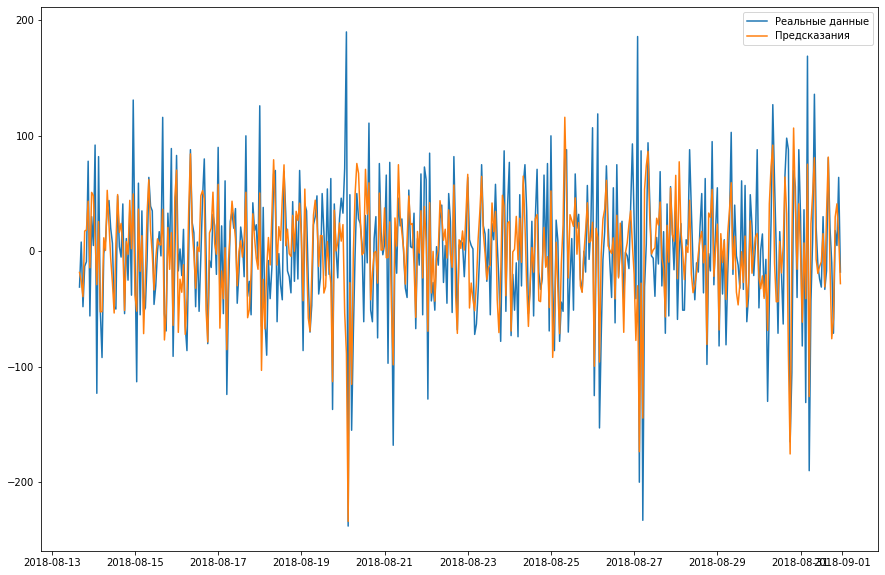

In [61]:
plt.figure(figsize=(15, 10))
plt.plot(target_test.index, target_test, label = "Реальные данные")
plt.plot(target_test.index, predicted_test, label = "Предсказания")
plt.legend()
plt.show()


**Выводы:** RMSE модели `LinearRegression` на тестовой - ~~44,67~~ 42, что удовлетворяет требованию заказчика.

## Общий вывод

1. Мы провели анализ и подготовку данных:
- было проведено ресемплирование данных по одному часу;
- был обнаружен тренд равномерного роста заказов с периодическими небольшими падениями, а также сезонность по дням - спад ночью, рост с утра и днем, пик к вечеру;
- временной ряд был преобразован в более стационарный путем нахождения разности его значений.
2. Были подготовлены признаки к обучению моделей:
- были добавлены новые признаки: календарные признаки (день и час), «отстающие значения», скользящее среднее;
- категориальные признаки были преобразованы в численные с помощью техники прямого кодирования (One-Hot Encoding, OHE) с параметром `drop='first'`, помогающим избежать "ловушки фиктивных признаков" (это кодирование использовали для линейной регрессии, для древовидных моделей было принято решение не использовать кодирование);
- для числовых признаков была проведена стандартизация данных с помощью StandardScaler.
3. Целевым признаком определили количество заказов - `num_orders`. Разбили данные на 2 выборки в соотношении - обучающую и тестовую, для тестовой выделили 10% данных.
4. Задача была определена, как регрессия. Для решения задачи были применены и исследованы пять вариантов моделирования: линейная регрессия, дерево решений, случайный лес, градиентные бустинги LightGBM и CatBoostRegressor (гиперпараметры были подобраны при помощи GridSearchCV, фолды определили при помощи TimeSeriesSplit):
- модель `LinearRegression` показала наилучший RMSE на обучающей выборке = 27,34 (удовлетворяет требованиям заказчика);
- для модели `DecisionTreeRegressor` были проанализированы 15 вариантов: с гиперпараметром `max_depth` - максимальная глубина дерева - от 1 до 15. Она показала RMSE = 31,97 при max_depth=4 (удовлетворяет требованиям заказчика);
- для моделей `RandomForestRegressor` было проанализировано 150 вариантов: с гиперпараметром `n_estimators` - количество деревьев - от 10 до 100 с шагом 10, и гиперпараметром `max_depth` - максимальная глубина - от 1 до 15. Наилучший результат показала модель с количеством деревьев 100 и с глубиной дерева 11: RMSE = 28,77 (удовлетворяет требованиям заказчика);
- модель `LGBMRegressor` оказалась лучшей по RMSE. Модель была проанализирована в 15 вариантах с гиперпараметрами: `num_leaves` - от 10 до 100 с шагом 20, `learning_rate` - 0.2, 0.4, 0.8. Наилучший результат показала модель с гиперпараметрами 'learning_rate': 0.2, 'num_leaves': 10: RMSE = 28,18 (удовлетворяет требованиям заказчика);
- для модели `CatBoostRegressor` было проанализировано 45 вариантов: скорость обучения (`learning_rate`): 0.1,0.4,0.9, количество деревьев в ансамбле (`iterations`): от 100 до 250 с шагом 50, глубина дерева `depth` от 1 до 15 с шагом 3. Наилучший результат показала модель с гиперпараметрами 'depth': 4, 'iterations': 200, 'learning_rate': 0.1: RMSE = 27,5 (удовлетворяет требованиям заказчика).
5. Наилучшая модель `LinearRegression` на тестовой выборке показала RMSE = 42, что удовлетворяет требованиям заказчика.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48